In [8]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import time
import os
from scipy.io import wavfile
import librosa
from IPython.display import display, Math
from time import perf_counter

os.makedirs("./lab4_plots", exist_ok=True)

Ex1

In [9]:
os.makedirs("lab4_plots/ex1", exist_ok=True)

N = [128, 256, 512, 1024, 2048, 4096, 8192]
L_timp_dft = []
L_timp_fft = []

for N_aux in N:
    x = np.random.uniform(-1, 1, N_aux)
    
    coloana = np.arange(N_aux).reshape(N_aux, 1) # indicii k
    linie = np.arange(N_aux).reshape(1, N_aux) # indicii m
    produs_vectorial = coloana*linie
    print(produs_vectorial)

    start = time.time()
    n = len(x)
    X = np.zeros(n, dtype=np.complex_)
    exp = np.exp(-2*np.pi*1j*produs_vectorial/n)
    X = x@exp # inmultire matriceala
    L_timp_dft.append(time.time()-start)

    start = time.perf_counter()
    np_fft_result = np.fft.fft(x)
    L_timp_fft.append(time.perf_counter()-start)
    print(L_timp_fft)

[[    0     0     0 ...     0     0     0]
 [    0     1     2 ...   125   126   127]
 [    0     2     4 ...   250   252   254]
 ...
 [    0   125   250 ... 15625 15750 15875]
 [    0   126   252 ... 15750 15876 16002]
 [    0   127   254 ... 15875 16002 16129]]
[3.9000005926936865e-05]
[[    0     0     0 ...     0     0     0]
 [    0     1     2 ...   253   254   255]
 [    0     2     4 ...   506   508   510]
 ...
 [    0   253   506 ... 64009 64262 64515]
 [    0   254   508 ... 64262 64516 64770]
 [    0   255   510 ... 64515 64770 65025]]
[3.9000005926936865e-05, 3.589998232200742e-05]
[[     0      0      0 ...      0      0      0]
 [     0      1      2 ...    509    510    511]
 [     0      2      4 ...   1018   1020   1022]
 ...
 [     0    509   1018 ... 259081 259590 260099]
 [     0    510   1020 ... 259590 260100 260610]
 [     0    511   1022 ... 260099 260610 261121]]
[3.9000005926936865e-05, 3.589998232200742e-05, 7.369997911155224e-05]
[[      0       0       0 ..

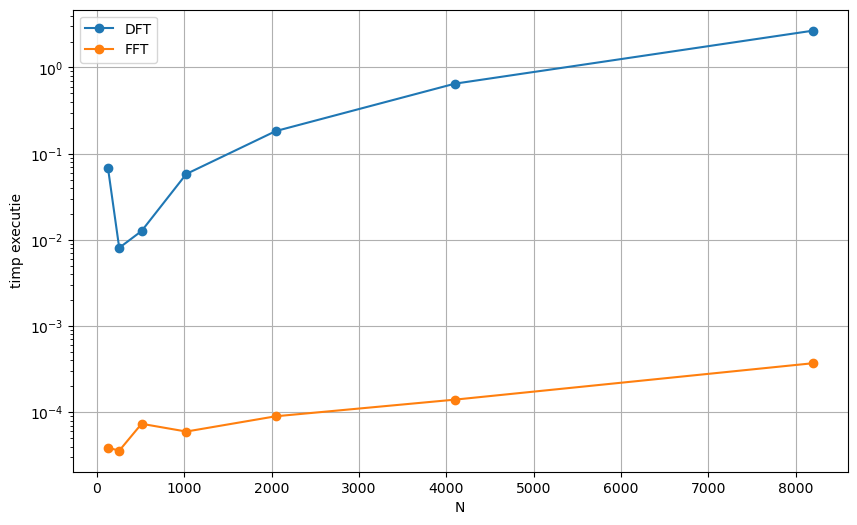

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(N, L_timp_dft, marker='o', label='DFT')
plt.plot(N, L_timp_fft, marker='o',label='FFT')
plt.xlabel('N')
plt.ylabel('timp executie')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.savefig(fname="./lab4_plots/ex1/comparatie_timpi_dft_vs_fft.pdf", format="pdf")
plt.show()

Ex2

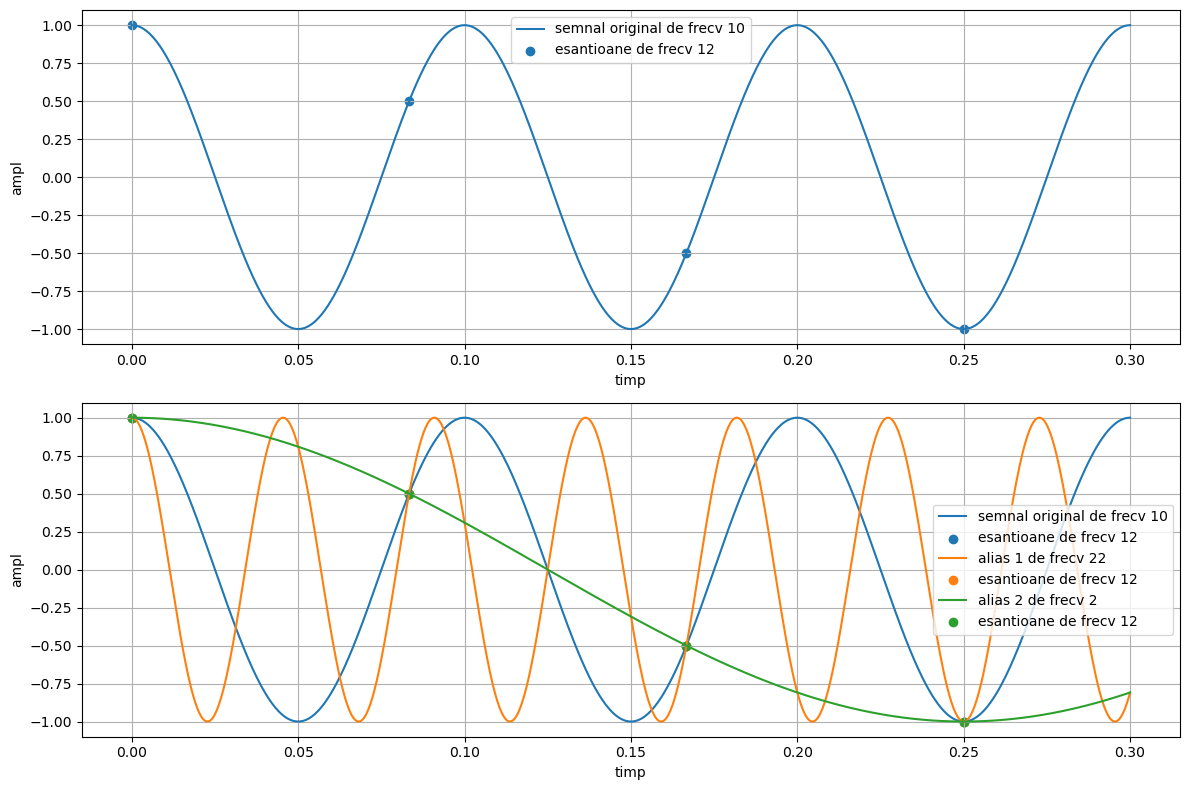

In [4]:
os.makedirs("lab4_plots/ex2", exist_ok=True)

frecv0 = 10 # frecv semnalului original
ampl = 1
faza = 0
fs = 12 # frecv de esantionare fs Nyquist (fs<2*f0=20)

t_continuu = np.linspace(0, 0.3, 1000) # durata si rata_esantionare random
x_original = ampl*np.cos(2*np.pi*frecv0*t_continuu+faza)
t_esantionat = np.arange(0, 0.3, 1/fs) # timp de esantionare
x_esantionat = ampl*np.cos(2*np.pi*frecv0*t_esantionat+faza) # ma gandesc la cos(faza)==cos(faza+2*np.pi*k)

frecv1 = 22
frecv2 = 2
x1 = ampl*np.cos(2*np.pi*frecv1*t_continuu+faza) # celelalte doua semnale care produc aceleasi esantioane
x2 = ampl*np.cos(2*np.pi*frecv2*t_continuu+faza)

x1_esantionat = ampl*np.cos(2*np.pi*frecv1*t_esantionat+faza)
x2_esantionat = ampl*np.cos(2*np.pi*frecv2*t_esantionat+faza)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(t_continuu, x_original, label=f'semnal original de frecv {frecv0}')
axs[0].scatter(t_esantionat, x_esantionat, label=f'esantioane de frecv {fs}')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t_continuu, x_original, label=f'semnal original de frecv {frecv0}')
axs[1].scatter(t_esantionat, x_esantionat, label=f'esantioane de frecv {fs}')
axs[1].plot(t_continuu, x1, label=f'alias 1 de frecv {frecv1}')
axs[1].scatter(t_esantionat, x1_esantionat, label=f'esantioane de frecv {fs}')
axs[1].plot(t_continuu, x2, label=f'alias 2 de frecv {frecv2}')
axs[1].scatter(t_esantionat, x2_esantionat, label=f'esantioane de frecv {fs}')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('ampl')
axs[1].grid(True)
axs[1].legend()
# se observa ca atunci cand dau scatter, toate punctele coincid, adica pe scurt transformata Fourier nu va putea determina parametrii pentru reconstruirea semnalului, deoarece deja sunt mai mult de doua semnale la care corespund esantionarile

plt.tight_layout()
plt.savefig('lab4_plots/ex2/dem_aliasing.pdf', format="pdf")
plt.show()


Ex3

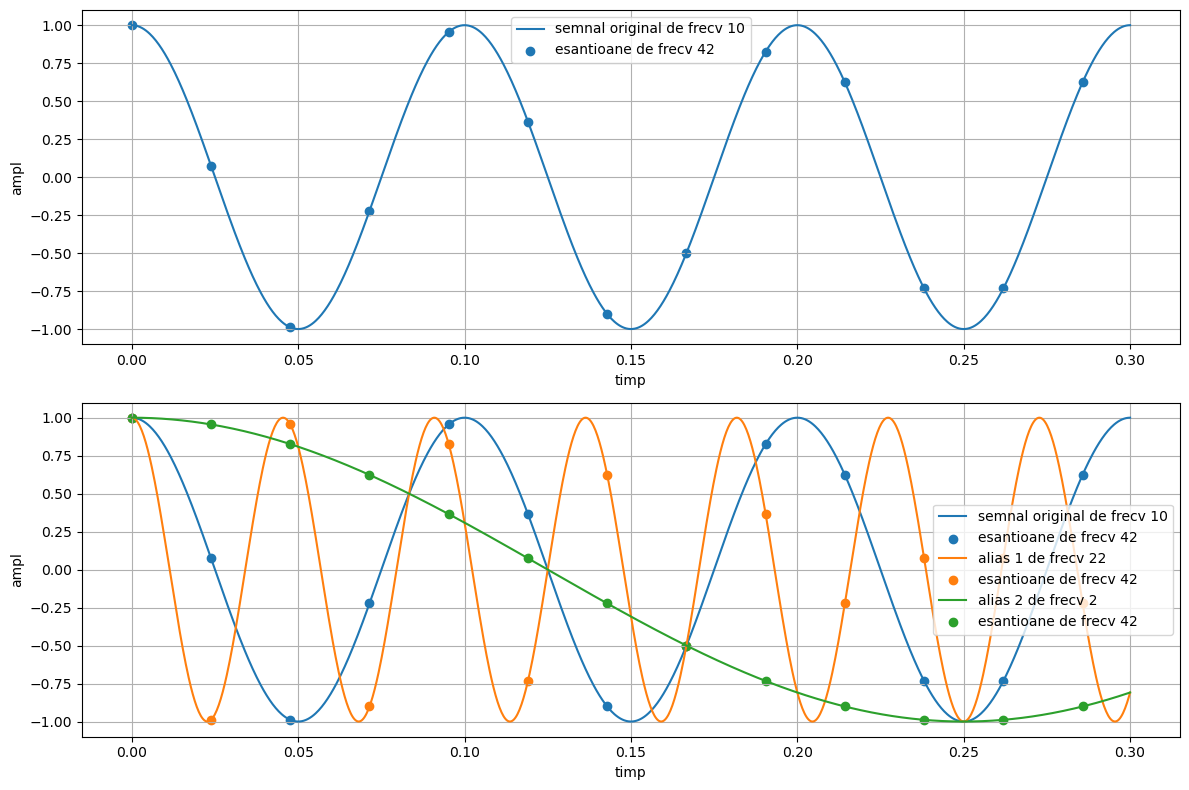

In [5]:
os.makedirs("lab4_plots/ex3", exist_ok=True)

frecv0 = 10 # frecv semnalului original
ampl = 1
faza = 0
fs = 42 # frecv de esantionare fs Nyquist (fs>2*f0=20)

t_continuu = np.linspace(0, 0.3, 1000) # durata si rata_esantionare random
x_original = ampl*np.cos(2*np.pi*frecv0*t_continuu+faza)
t_esantionat = np.arange(0, 0.3, 1/fs) # timp de esantionare
x_esantionat = ampl*np.cos(2*np.pi*frecv0*t_esantionat+faza) # ma gandesc la cos(faza)==cos(faza+2*np.pi*k)

frecv1 = 22
frecv2 = 2
x1 = ampl*np.cos(2*np.pi*frecv1*t_continuu+faza) # celelalte doua semnale care produc aceleasi esantioane
x2 = ampl*np.cos(2*np.pi*frecv2*t_continuu+faza)

x1_esantionat = ampl*np.cos(2*np.pi*frecv1*t_esantionat+faza)
x2_esantionat = ampl*np.cos(2*np.pi*frecv2*t_esantionat+faza)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(t_continuu, x_original, label=f'semnal original de frecv {frecv0}')
axs[0].scatter(t_esantionat, x_esantionat, label=f'esantioane de frecv {fs}')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t_continuu, x_original, label=f'semnal original de frecv {frecv0}')
axs[1].scatter(t_esantionat, x_esantionat, label=f'esantioane de frecv {fs}')
axs[1].plot(t_continuu, x1, label=f'alias 1 de frecv {frecv1}')
axs[1].scatter(t_esantionat, x1_esantionat, label=f'esantioane de frecv {fs}')
axs[1].plot(t_continuu, x2, label=f'alias 2 de frecv {frecv2}')
axs[1].scatter(t_esantionat, x2_esantionat, label=f'esantioane de frecv {fs}')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('ampl')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.savefig('lab4_plots/ex3/evitare_aliasing.pdf', format="pdf")
plt.show()

Ex4
- contrabas 40 - 200 Hz
- frecv minima de esantionare (raportandu-ma la cea maxima, adica 200 Hz) fs>=2*200, deci fs=400

Ex5
- cauta in foledrul ex5 din lab4

Ex6

https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

https://thewolfsound.com/how-to-plot-audio-spectrogram-for-machine-learning-magnitude-stft-of-audio-signal-with-python-librosa-and-matplotlib/

C:\Users\alice\AppData\Local\Temp\ipykernel_13848\4263205733.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 5000)


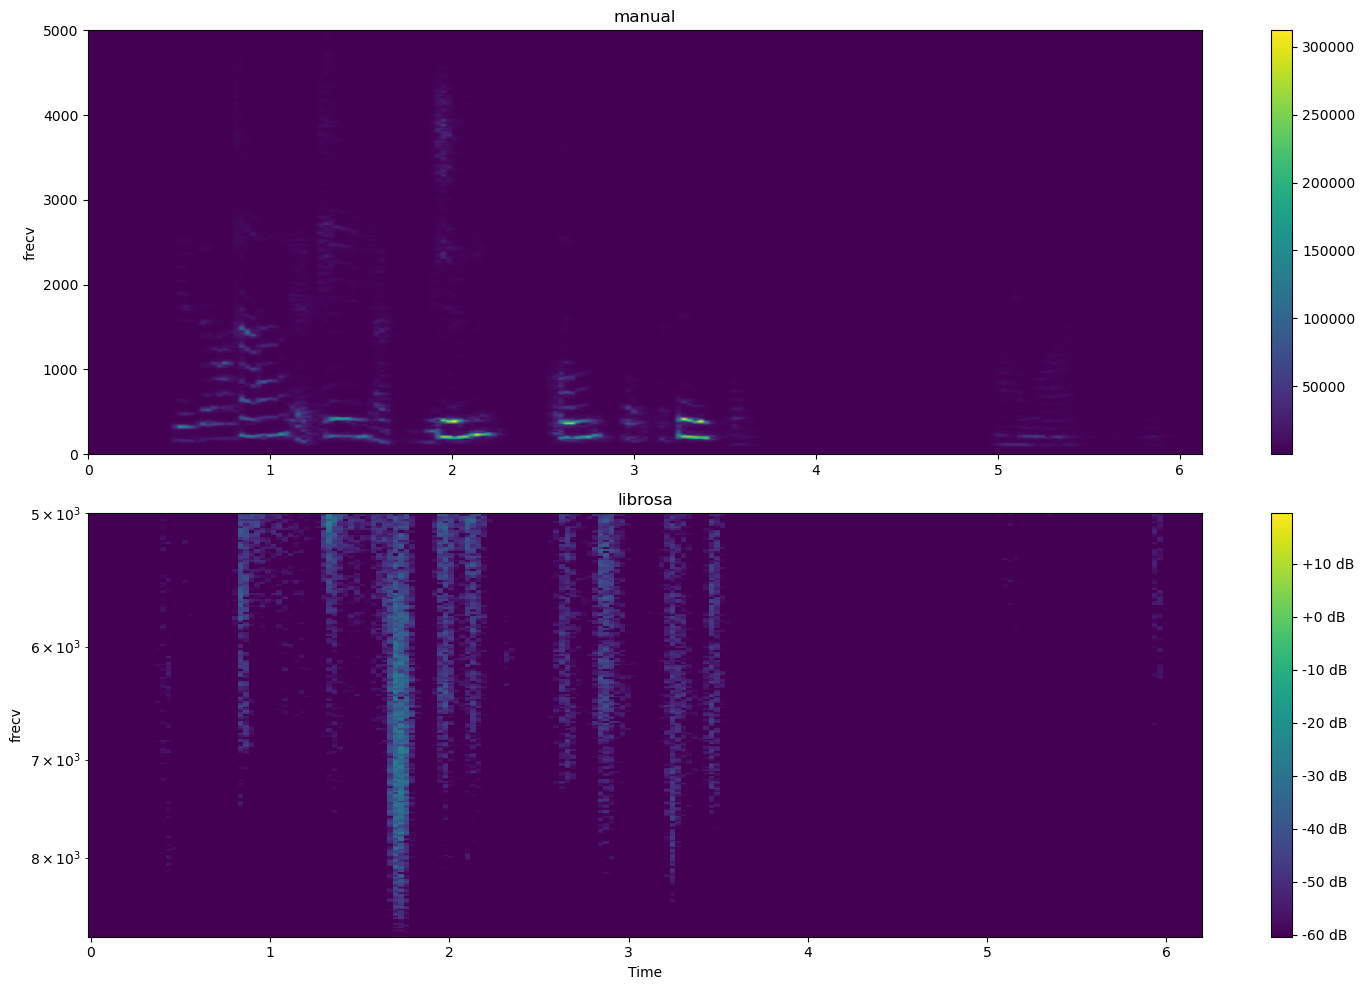

In [15]:
os.makedirs("lab4_plots/ex6", exist_ok=True)

fs, x = wavfile.read('lab4_plots/ex5/untitled.wav')

if len(x.shape) > 1: # rezolva eroarea: operands could not be broadcast together with shapes (2873,2) (2873,) 
    x = x[:, 0]

N = len(x)
# denumite asa deoarece urmeaza sa aplic Hanning window, iar librosa chiar are un parametru pentru hop_length
# short time Fourier transform e efectul de "windowing a signal" si calcularea unui dft pentru acel semnal
# window e partea dintr-un semnal, pentru care aplic fft, si avansez pana cand e procesat intreg semnalul cu hop_length esantioane
window_size = int(0.01*N) # 1% din semnal
hop_length = window_size//2 # 50% suprapunere

spectrogram = []
for i in range(0, N-window_size, hop_length):
    window = x[i:i+window_size]
    window = window * np.hanning(len(window)) # Hanning window
    fft = np.fft.fft(window)
    fft_magnitude = np.abs(fft[:window_size//2]) # se pastreaza numai partea reala
    spectrogram.append(fft_magnitude)

spectrogram_matrix = np.array(spectrogram).T # matrice transpusa
time_manual = np.arange(spectrogram_matrix.shape[1]) * hop_length/fs
freq_manual = np.fft.fftfreq(window_size, 1/fs)[:window_size//2]

# librosa implem
x_librosa, sr = librosa.load('lab4_plots/ex5/untitled.wav', sr=None) 
X_librosa = librosa.stft(x_librosa, n_fft=window_size, hop_length=hop_length)
Xdb_librosa = librosa.amplitude_to_db(np.abs(X_librosa)) # ampl in decibeli

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

im1 = axs[0].imshow(spectrogram_matrix, aspect='auto', origin='lower', extent=[time_manual[0], time_manual[-1], freq_manual[0], freq_manual[-1]], cmap='viridis')
axs[0].set_title('manual')
axs[0].set_ylabel('frecv')
#axs[0].set_yscale('log')
axs[0].set_ylim(0, min(5000, freq_manual[-1]))
plt.colorbar(im1, ax=axs[0])
librosa.display.specshow(Xdb_librosa, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', ax=axs[1], cmap='viridis')
axs[1].set_title('librosa')
axs[1].set_ylabel('frecv')
axs[1].set_yscale('log')
axs[1].set_ylim(0, 5000)
plt.colorbar(axs[1].collections[0], ax=axs[1], format='%+2.0f dB')
plt.tight_layout()
plt.savefig('lab4_plots/ex6/spectograma.pdf', format="pdf")
plt.show()

Ex7

- Psemnal = 90dB = 10^9 unitati
- raportul semnal zgomot SNRdB = 80dB = 10^8 unitati

- puterea zgomotului poate fi dedusa de aici:

In [ ]:
display(Math(r"\text{SNR}_{dB} = 10 \log_{10} \left( \frac{P_{\text{semnal}}}{P_{\text{zgomot}}} \right)"))

<IPython.core.display.Math object>

- inlocuim SNRdB si Psemnal (calculul in unitati si nu in decibeli)
- Pzgomot = 10^9/ 10^8 = 10 unitati = 10log10(10) = 10 dB